<a href="https://colab.research.google.com/github/nguyenvantai102/CS114.L21.KHCL/blob/main/Colab03_BaiTapWecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THÀNH VIÊN NHÓM
| STT | Họ tên | MSSV | Email | Github |Lớp|
| :---: | --- | --- | --- | --- |---|
| 1 | Nguyễn Văn Tài | 19520250 | *19520250@gm.uit.edu.vn* | [nguyenvantai](https://github.com/nguyenvantai102) |CS114.L21.KHCL|
| 2 | Trần Xuân Nhơn | 18521212 | *18521212@gm.uit.edu.vn* | [18521212](https://github.com/18521212)|CS114.L21.KHCL|
| 3 | Nguyễn Ngọc Trưởng | 19522440 | *19522440@gm.uit.edu.vn* |[nguyenngoctruong2k1](https://github.com/nguyenngoctruong)|CS114.L22.KHCL|

# I. Phân tích, tiền xử lý dữ liệu

## 1. READ DATA

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
ScoreTraining = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_ML/score_training.csv')
wecode = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_ML/wecode.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [ ]:
ScoreTraining

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


## 2. LẤY NHỮNG CỘT CẦN THIẾT

### 2.1 Những cột cần thiết trong file score_training

In [ ]:
Score = ScoreTraining.sort_values("CK").reset_index()[['id','CK']]
Score

,id,CK
0,960,0
1,562,0
2,1529,0
3,1193,0
4,1471,0
...,...,...
970,1319,
971,876,
972,1217,
973,989,


In [ ]:
Score.dtypes

id     int64
CK    object
dtype: object

In [ ]:
Score.CK.value_counts()

8      104
7.5     94
7       78
8.5     73
6.5     67
6       63
9       61
5.5     61
5       60
        54
4.5     48
4       48
9.5     30
3.5     29
2.5     28
3       25
0       24
2       10
1.5      6
1        6
0.5      3
10       2
Name: CK, dtype: int64

##### ? Cần biết giá trị của kí tự trắng kia là gì

In [ ]:
value = {}
for i in range(len(Score)):
   if Score.iloc[i,1] not in value:
     value.update({Score.iloc[i,1]:len(value)})
value

{'0': 0,
 '0.5': 1,
 '1': 2,
 '1.5': 3,
 '10': 4,
 '2': 5,
 '2.5': 6,
 '3': 7,
 '3.5': 8,
 '4': 9,
 '4.5': 10,
 '5': 11,
 '5.5': 12,
 '6': 13,
 '6.5': 14,
 '7': 15,
 '7.5': 16,
 '8': 17,
 '8.5': 18,
 '9': 19,
 '9.5': 20,
 nan: 22,
 '\xa0': 21}

In [ ]:
ScoreNull = Score.loc[(Score.CK == "\xa0") ]

##### Thành quả - kiểm tra lại

In [ ]:
Score = Score.loc[(Score.CK != "\xa0")]
Score

,id,CK
0,960,0
1,562,0
2,1529,0
3,1193,0
4,1471,0
...,...,...
916,1027,9.5
917,1459,9.5
918,66,9.5
919,1608,9.5


In [ ]:
Score.CK = Score.CK.apply(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
Score = Score.loc[(Score.CK <= 10) & (Score.CK>=0)]
Score

,id,CK
0,960,0.0
1,562,0.0
2,1529,0.0
3,1193,0.0
4,1471,0.0
...,...,...
915,1609,9.5
916,1027,9.5
917,1459,9.5
918,66,9.5


### 2.2 Lấy những cột cần thiết trong file wecode

In [ ]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


Bỏ đi một số cột nghĩ là không quan trọng và không có ảnh hưởng gì đến điểm số: file_name, language_id, created_at, updated_at, status

In [ ]:
wecode1 = wecode.iloc[:,0:8].drop("status", axis=1)
wecode1

,id,assignment_id,problem_id,user_id,is_final,pre_score,coefficient
0,4,0,3,4,1,10000,100
1,5,0,4,4,1,10000,100
2,6,0,5,4,0,0,100
3,7,0,5,4,0,0,100
4,8,0,5,4,0,0,100
...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,0,100
264602,266668,0,25,1796,0,0,100
264603,266669,0,25,1796,1,10000,100
264604,266670,0,150,255,1,6250,100


In [ ]:
wecode1.assignment_id.nunique()

290

Khi cắt bớt các cột thì thấy vẫn còn dư thừa cột id, asignment_id

In [ ]:
wecode2 = wecode1.iloc[:,2:]
wecode2

,problem_id,user_id,is_final,pre_score,coefficient
0,3,4,1,10000,100
1,4,4,1,10000,100
2,5,4,0,0,100
3,5,4,0,0,100
4,5,4,0,0,100
...,...,...,...,...,...
264601,25,1796,0,0,100
264602,25,1796,0,0,100
264603,25,1796,1,10000,100
264604,150,255,1,6250,100


In [ ]:
wecode2.coefficient.nunique()

129

### 2.3 Phân tích, phán đoán những giá trị có thể ảnh hưởng đến điểm thi cuối kì
- Số bài nộp cuối cùng: CountIsFinal
- Tổng số bài nộp: CountSubmit
- Tổng số phần trăm test đúng: SumTestTrue
- Tổng điểm = sum (phần trăm test đúng *coeficient): SumScore
- Tổng số lần submit đúng 100% test: CountTrueSubmit
- Tổng số problem đã xanh: CountTrueProblem

#### *Số bài nộp cuối cùng

In [ ]:
CountIsFinal = wecode2.groupby("user_id")[["is_final"]].sum().reset_index().rename(columns={'user_id':'id','is_final' : 'CountIsFinal'})
CountIsFinal

,id,CountIsFinal
0,1,2
1,4,38
2,5,5
3,6,88
4,7,2
...,...,...
1154,1860,48
1155,1862,6
1156,1864,63
1157,1865,17


@ Join 

In [ ]:
df = CountIsFinal.merge(Score, on='id', how="inner")
df

,id,CountIsFinal,CK
0,24,77,9.5
1,27,5,10.0
2,29,80,8.5
3,34,84,6.5
4,35,151,4.5
...,...,...,...
801,1856,31,7.5
802,1857,40,4.0
803,1859,30,1.5
804,1862,6,7.5


In [ ]:
df.dtypes

id                int64
CountIsFinal      int64
CK              float64
dtype: object

@ Vẽ đồ thị biểu diễn

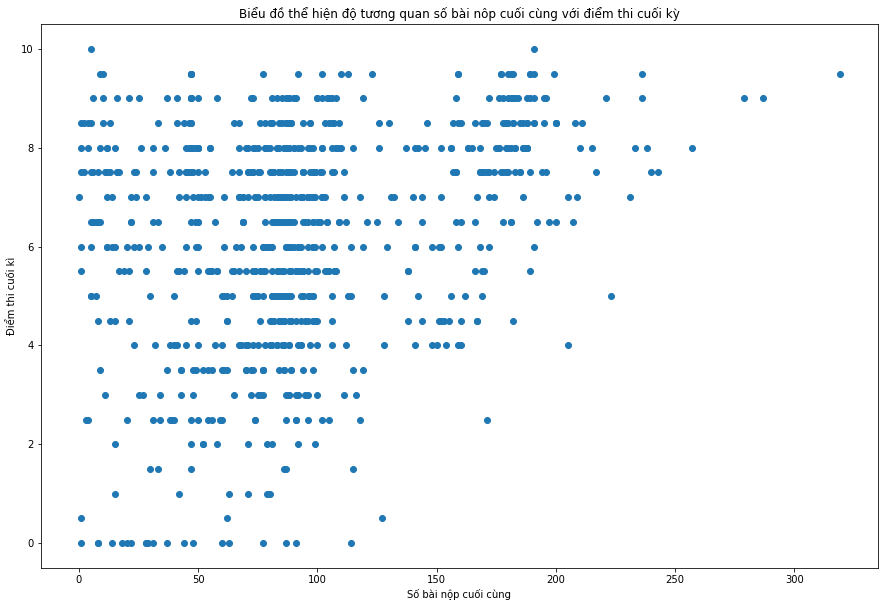

In [ ]:
import matplotlib.pyplot as plt
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['CountIsFinal'], y = df['CK'])
axs.set_title("Biểu đồ thể hiện độ tương quan số bài nôp cuối cùng với điểm thi cuối kỳ")
axs.set(xlabel='Số bài nộp cuối cùng', ylabel='Điểm thi cuối kì')
plt.show()

#### *Đếm tổng số submit

In [ ]:
CountSubmit = wecode2.groupby("user_id")[["is_final"]].count().reset_index().rename(columns={'user_id':'id','is_final' : 'CountSubmit'})           
CountSubmit

,id,CountSubmit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


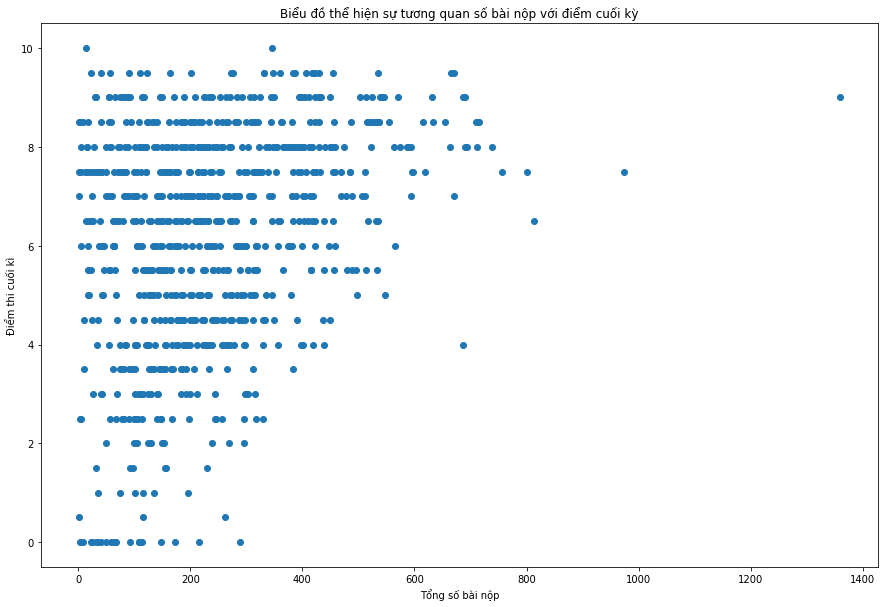

In [ ]:
df = CountSubmit.merge(Score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['CountSubmit'], y = df['CK'])
axs.set_title("Biểu đồ thể hiện sự tương quan số bài nộp với điểm cuối kỳ")
axs.set(xlabel='Tổng số bài nộp', ylabel='Điểm thi cuối kì')
plt.show()

#### *Tổng số phần trăm test đúng của tất cả problem
Bài nộp phải là cuối cùng, giá trị có thể ảnh hưởng vì nhiều thành phần sinh viên thường trễ deadline ko phải vì học kém

In [ ]:
SumTestTrue = (wecode2.loc[wecode2.is_final == 1]).groupby("user_id")[["pre_score"]].sum().reset_index().rename(columns={'user_id':'id','pre_score' : 'SumTestTrue'})
SumTestTrue

,id,SumTestTrue
0,1,10000
1,4,370000
2,5,30000
3,6,850000
4,7,9209
...,...,...
1152,1860,329665
1153,1862,40000
1154,1864,439741
1155,1865,116428


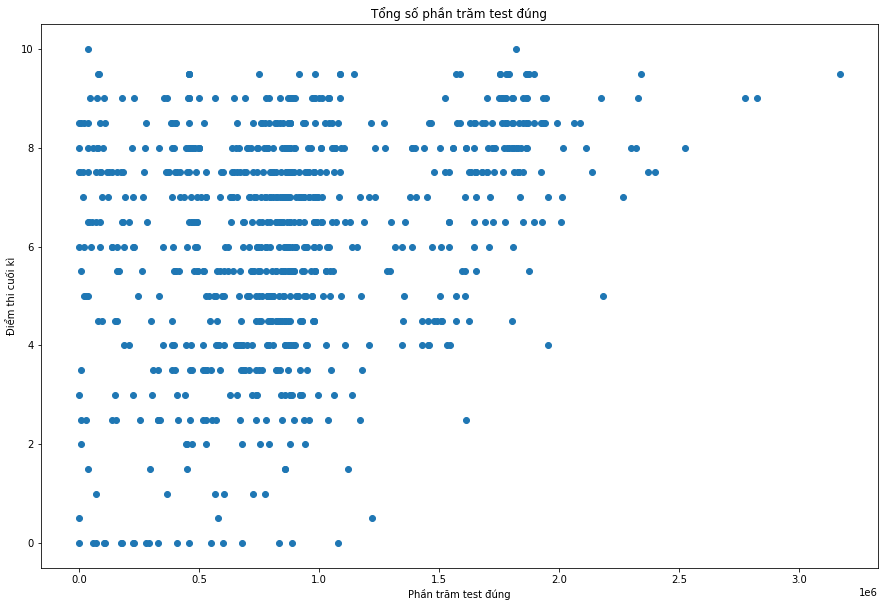

In [ ]:
df = SumTestTrue.merge(Score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['SumTestTrue'], y = df['CK'])
axs.set_title("Tổng số phần trăm test đúng")
axs.set(xlabel='Phần trăm test đúng', ylabel='Điểm thi cuối kì')
plt.show()

#### *Tổng điểm đạt được = Sum (phần trăm test đúng * hệ số)

In [ ]:
wecode2.dtypes

problem_id      int64
user_id         int64
is_final        int64
pre_score       int64
coefficient    object
dtype: object

COEFICIENT có giá trị không phải là số, nên cần phải kiểm tra lại và gán lại giá trị

In [ ]:
wecode2.coefficient.value_counts()

100      257952
0          2805
120         634
70          610
error       252
          ...  
38            2
40            1
66            1
109           1
22            1
Name: coefficient, Length: 129, dtype: int64

In [ ]:
wecode2.loc[wecode2.coefficient == "error"]

,problem_id,user_id,is_final,pre_score,coefficient
42670,89,930,0,2000,error
42728,89,930,0,2000,error
42786,89,930,1,10000,error
42808,88,930,0,2727,error
42818,88,930,0,0,error
...,...,...,...,...,...
217035,361,1442,1,10000,error
217397,361,1187,1,10000,error
264010,328,791,1,10000,error
264011,323,791,1,10000,error


In [ ]:
wecode3 = wecode2.loc[wecode2.coefficient == "error"]
wecode3.coefficient = 0
wecode2.update(wecode3)
wecode2

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,problem_id,user_id,is_final,pre_score,coefficient
0,3.0,4.0,1.0,10000.0,100
1,4.0,4.0,1.0,10000.0,100
2,5.0,4.0,0.0,0.0,100
3,5.0,4.0,0.0,0.0,100
4,5.0,4.0,0.0,0.0,100
...,...,...,...,...,...
264601,25.0,1796.0,0.0,0.0,100
264602,25.0,1796.0,0.0,0.0,100
264603,25.0,1796.0,1.0,10000.0,100
264604,150.0,255.0,1.0,6250.0,100


In [ ]:
wecode2.coefficient = wecode2.coefficient.apply(int)

In [ ]:
wecode2.dtypes

problem_id     float64
user_id        float64
is_final       float64
pre_score      float64
coefficient      int64
dtype: object

Tính [pre_score]*[coefficient]

In [ ]:
wecode2["sum_score"] = wecode2["pre_score"] * wecode2["coefficient"]
wecode2

,problem_id,user_id,is_final,pre_score,coefficient,sum_score
0,3.0,4.0,1.0,10000.0,100,1000000.0
1,4.0,4.0,1.0,10000.0,100,1000000.0
2,5.0,4.0,0.0,0.0,100,0.0
3,5.0,4.0,0.0,0.0,100,0.0
4,5.0,4.0,0.0,0.0,100,0.0
...,...,...,...,...,...,...
264601,25.0,1796.0,0.0,0.0,100,0.0
264602,25.0,1796.0,0.0,0.0,100,0.0
264603,25.0,1796.0,1.0,10000.0,100,1000000.0
264604,150.0,255.0,1.0,6250.0,100,625000.0


In [ ]:
SumScore = (wecode2.loc[wecode2.is_final == 1]).groupby("user_id")["sum_score"].sum().reset_index().rename(columns={'user_id':'id', 'sum_score':'SumScore'})
SumScore

,id,SumScore
0,1.0,1000000.0
1,4.0,37000000.0
2,5.0,3000000.0
3,6.0,85000000.0
4,7.0,920900.0
...,...,...
1152,1860.0,32966500.0
1153,1862.0,4000000.0
1154,1864.0,43974100.0
1155,1865.0,11642800.0


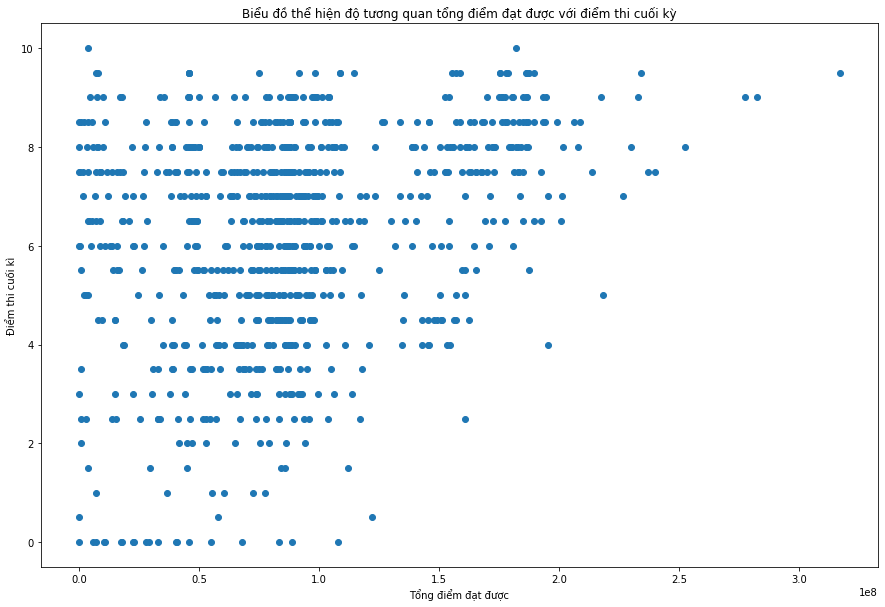

In [ ]:
df = SumScore.merge(Score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['SumScore'], y = df['CK'])
axs.set_title("Biểu đồ thể hiện độ tương quan tổng điểm đạt được với điểm thi cuối kỳ")
axs.set(xlabel='Tổng điểm đạt được', ylabel='Điểm thi cuối kì')
plt.show()

#### *Số lần submit đúng 100%

In [ ]:
CountTrueSubmit = (wecode2.loc[(wecode2.pre_score == 10000) & (wecode2.is_final == 1)]).groupby("user_id")[["is_final"]].count().reset_index().rename(columns={'user_id':'id','is_final' : 'CountTrueSubmit'})           
CountTrueSubmit

,id,CountTrueSubmit
0,1.0,1
1,4.0,37
2,5.0,3
3,6.0,85
4,11.0,9
...,...,...
1134,1860.0,28
1135,1862.0,4
1136,1864.0,28
1137,1865.0,10


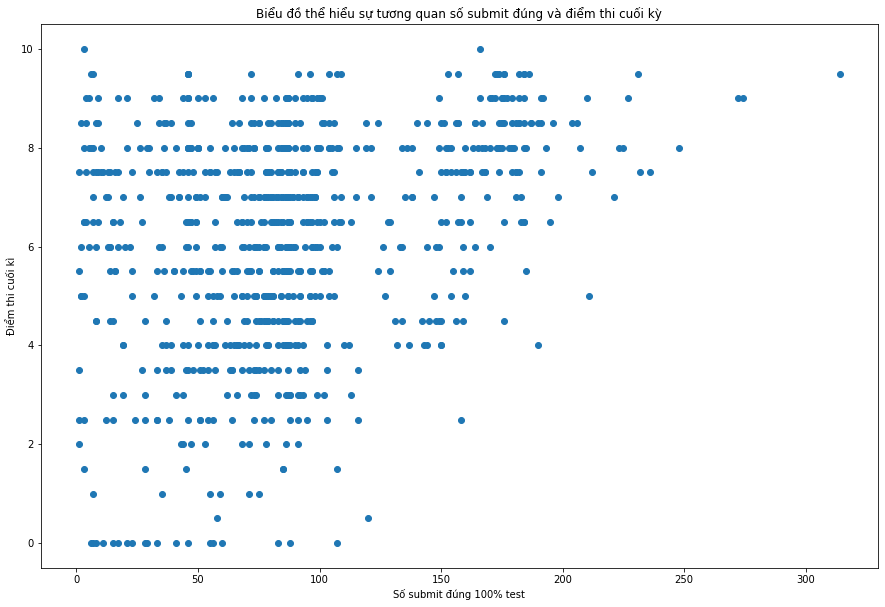

In [ ]:
df = CountTrueSubmit.merge(Score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['CountTrueSubmit'], y = df['CK'])
axs.set_title("Biểu đồ thể hiểu sự tương quan số submit đúng và điểm thi cuối kỳ")
axs.set(xlabel='Số submit đúng 100% test', ylabel='Điểm thi cuối kì')
plt.show()

#### *Đếm số problem đã giải 100% test

In [ ]:
wecode2

,problem_id,user_id,is_final,pre_score,coefficient,sum_score
0,3.0,4.0,1.0,10000.0,100,1000000.0
1,4.0,4.0,1.0,10000.0,100,1000000.0
2,5.0,4.0,0.0,0.0,100,0.0
3,5.0,4.0,0.0,0.0,100,0.0
4,5.0,4.0,0.0,0.0,100,0.0
...,...,...,...,...,...,...
264601,25.0,1796.0,0.0,0.0,100,0.0
264602,25.0,1796.0,0.0,0.0,100,0.0
264603,25.0,1796.0,1.0,10000.0,100,1000000.0
264604,150.0,255.0,1.0,6250.0,100,625000.0


In [ ]:
wecode2.value_counts("problem_id")

problem_id
86.0     4732
6.0      4417
4.0      4213
240.0    3836
319.0    3356
         ... 
157.0       1
158.0       1
393.0       1
159.0       1
104.0       1
Length: 634, dtype: int64

In [ ]:
#số problem xanh
problem = (wecode2.loc[wecode2.pre_score == 10000]).groupby(["user_id","problem_id"])[["pre_score"]].max().reset_index() 
CountTrueProblem = problem.groupby(["user_id"])[["problem_id"]].count().reset_index().rename(columns={"user_id":"id",'problem_id':'CountTrueProblem'})   
CountTrueProblem

,id,CountTrueProblem
0,1.0,1
1,4.0,40
2,5.0,3
3,6.0,85
4,11.0,12
...,...,...
1134,1860.0,26
1135,1862.0,4
1136,1864.0,28
1137,1865.0,10


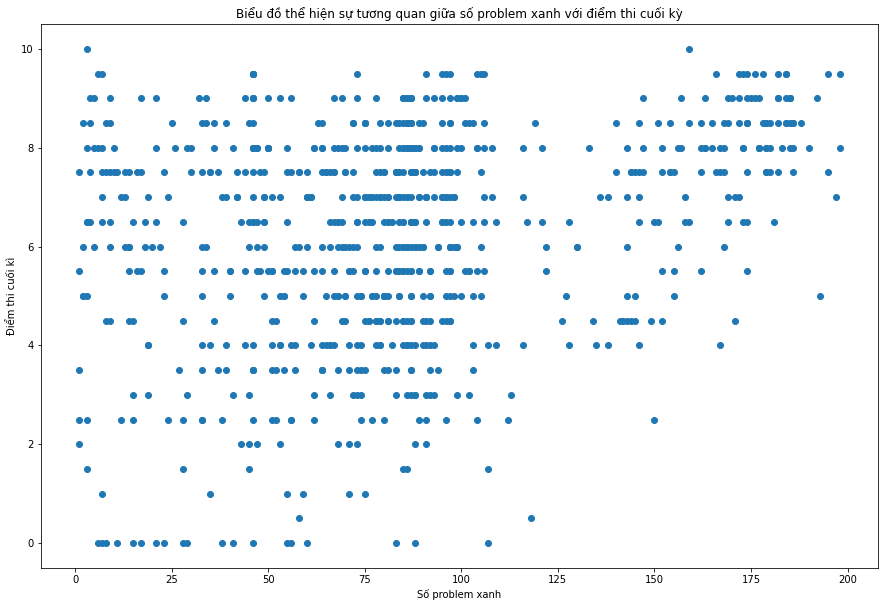

In [ ]:
df = CountTrueProblem.merge(Score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['CountTrueProblem'], y = df['CK'])
axs.set_title("Biểu đồ thể hiện sự tương quan giữa số problem xanh với điểm thi cuối kỳ")
axs.set(xlabel='Số problem xanh', ylabel='Điểm thi cuối kì')
plt.show()

In [ ]:
df.loc[df.CK == 10]

,id,CountTrueProblem,CK
1,27.0,3,10.0
138,343.0,159,10.0


### 2.4 Merge data

In [ ]:
def NotNaNFuntion(df,column):
  df1 = df.loc[df[column].isnull()]
  df1[column]=0
  df.update(df1)
  return df

#### Danh sách sinh viên có điểm trên wecode

In [ ]:
FinalWecode = CountIsFinal
FinalWecode = FinalWecode.merge(CountSubmit, on='id', how="inner")
FinalWecode = FinalWecode.merge(SumTestTrue, on='id', how="left")
FinalWecode = FinalWecode.merge(SumScore, on='id', how="left")
FinalWecode = FinalWecode.merge(CountTrueSubmit, on='id', how="left")
FinalWecode = FinalWecode.merge(CountTrueProblem, on='id', how="left")
#NaN Value
FinalWecode = NotNaNFuntion(FinalWecode,'SumTestTrue')
FinalWecode = NotNaNFuntion(FinalWecode,'SumScore')
FinalWecode = NotNaNFuntion(FinalWecode,'CountTrueSubmit')
FinalWecode = NotNaNFuntion(FinalWecode,'CountTrueProblem')
FinalWecode

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,CountIsFinal,CountSubmit,SumTestTrue,SumScore,CountTrueSubmit,CountTrueProblem
0,1.0,2.0,2.0,10000.0,1000000.0,1.0,1.0
1,4.0,38.0,54.0,370000.0,37000000.0,37.0,40.0
2,5.0,5.0,6.0,30000.0,3000000.0,3.0,3.0
3,6.0,88.0,130.0,850000.0,85000000.0,85.0,85.0
4,7.0,2.0,5.0,9209.0,920900.0,0.0,0.0
...,...,...,...,...,...,...,...
1154,1860.0,48.0,76.0,329665.0,32966500.0,28.0,26.0
1155,1862.0,6.0,12.0,40000.0,4000000.0,4.0,4.0
1156,1864.0,63.0,187.0,439741.0,43974100.0,28.0,28.0
1157,1865.0,17.0,99.0,116428.0,11642800.0,10.0,10.0


#### Danh sách sinh viên có điểm wecode và điểm cuối kỳ

In [ ]:
FinalData = Score.merge(FinalWecode, on='id', how="inner")
FinalData

,id,CK,CountIsFinal,CountSubmit,SumTestTrue,SumScore,CountTrueSubmit,CountTrueProblem
0,960,0.0,87.0,114.0,832428.0,83242800.0,83.0,83.0
1,562,0.0,31.0,92.0,294000.0,29400000.0,29.0,29.0
2,1529,0.0,18.0,41.0,173777.0,17377700.0,15.0,15.0
3,1193,0.0,22.0,49.0,103545.0,10354500.0,8.0,8.0
4,1471,0.0,37.0,61.0,330000.0,33000000.0,33.0,38.0
...,...,...,...,...,...,...,...,...
801,1605,9.5,177.0,276.0,1752388.0,175238800.0,172.0,172.0
802,202,9.5,159.0,535.0,1587776.0,158777600.0,157.0,97.0
803,310,9.5,180.0,407.0,1777888.0,177788800.0,174.0,174.0
804,1459,9.5,236.0,455.0,2339304.0,233930400.0,231.0,195.0


#### Sinh viên có điểm wecode nhưng chưa có điểm cuối kỳ

In [ ]:
DataPredict = FinalWecode.merge(Score,on="id",how="left")
DataPredict = DataPredict.loc[DataPredict.CK.isnull()]
DataPredict

,id,CountIsFinal,CountSubmit,SumTestTrue,SumScore,CountTrueSubmit,CountTrueProblem,CK
0,1.0,2.0,2.0,10000.0,1000000.0,1.0,1.0,NaN
1,4.0,38.0,54.0,370000.0,37000000.0,37.0,40.0,NaN
2,5.0,5.0,6.0,30000.0,3000000.0,3.0,3.0,NaN
3,6.0,88.0,130.0,850000.0,85000000.0,85.0,85.0,NaN
4,7.0,2.0,5.0,9209.0,920900.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
1149,1852.0,1.0,20.0,10000.0,1000000.0,1.0,1.0,NaN
1150,1855.0,67.0,134.0,649000.0,64900000.0,63.0,59.0,NaN
1154,1860.0,48.0,76.0,329665.0,32966500.0,28.0,26.0,NaN
1156,1864.0,63.0,187.0,439741.0,43974100.0,28.0,28.0,NaN


# II. Training

In [ ]:
X = FinalData[["CountIsFinal","CountSubmit","SumTestTrue","SumScore","CountTrueSubmit","CountTrueProblem"]]
X

,CountIsFinal,CountSubmit,SumTestTrue,SumScore,CountTrueSubmit,CountTrueProblem
0,87.0,114.0,832428.0,83242800.0,83.0,83.0
1,31.0,92.0,294000.0,29400000.0,29.0,29.0
2,18.0,41.0,173777.0,17377700.0,15.0,15.0
3,22.0,49.0,103545.0,10354500.0,8.0,8.0
4,37.0,61.0,330000.0,33000000.0,33.0,38.0
...,...,...,...,...,...,...
801,177.0,276.0,1752388.0,175238800.0,172.0,172.0
802,159.0,535.0,1587776.0,158777600.0,157.0,97.0
803,180.0,407.0,1777888.0,177788800.0,174.0,174.0
804,236.0,455.0,2339304.0,233930400.0,231.0,195.0


In [ ]:
Y = FinalData[["CK"]]
Y

,CK
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
801,9.5
802,9.5
803,9.5
804,9.5


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(806, 6)

Chia tập train, tập test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

Mô hình Linear Regression: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htm

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
def RoundScore(x):
    x = np.round(x*2)/2
    return x
y_predict = RoundScore(y_predict)

In ra MSE

In [ ]:
print("MSE:",np.average((y_predict - y_test)**2))

MSE: 3.9979338842975207


## Dự đoán điểm cho sinh viên có điểm wecode nhưng chưa có điểm cuối kỳ

In [ ]:
XPredict = DataPredict[["CountIsFinal","CountSubmit","SumTestTrue","SumScore","CountTrueSubmit","CountTrueProblem"]]
DataPredict["CK"]= RoundScore(model.predict(XPredict))
DataPredict

,id,CountIsFinal,CountSubmit,SumTestTrue,SumScore,CountTrueSubmit,CountTrueProblem,CK
0,1.0,2.0,2.0,10000.0,1000000.0,1.0,1.0,5.5
1,4.0,38.0,54.0,370000.0,37000000.0,37.0,40.0,5.5
2,5.0,5.0,6.0,30000.0,3000000.0,3.0,3.0,5.5
3,6.0,88.0,130.0,850000.0,85000000.0,85.0,85.0,5.5
4,7.0,2.0,5.0,9209.0,920900.0,0.0,0.0,5.5
...,...,...,...,...,...,...,...,...
1149,1852.0,1.0,20.0,10000.0,1000000.0,1.0,1.0,5.5
1150,1855.0,67.0,134.0,649000.0,64900000.0,63.0,59.0,6.0
1154,1860.0,48.0,76.0,329665.0,32966500.0,28.0,26.0,4.0
1156,1864.0,63.0,187.0,439741.0,43974100.0,28.0,28.0,6.0


In [ ]:
DataPredict.value_counts("CK")

CK
6.0    130
5.5     65
6.5     58
7.0     31
7.5     23
5.0     17
8.0     13
4.5      6
4.0      4
3.5      2
3.0      2
8.5      1
2.5      1
dtype: int64

## Thử với một số model khác

Mô hình RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train,y_train.reshape(-1))
y_predict = reg.predict(X_test)
y_predict = RoundScore(y_predict)
print("MSE:",np.average((y_predict - y_test)**2))

MSE: 6.557330441909706


Mô hình SVM: https://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn import svm
CK_svm = svm.SVR().fit(X_train,y_train.reshape(-1))
y_predict = CK_svm.predict(X_test)
y_predict = RoundScore(y_predict)
print("MSE:",np.average((y_predict - y_test)**2))

MSE: 5.466370124991462


# III. Nhận xét